In [1]:
import math
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from sklearn.metrics import accuracy_score
TRAIN_DATA_PATH = 'AG_G_dataset-PTC_training.csv'
TEST_DATA_PATH = 'AG_G_dataset-PTC_test.csv'
TARGET_NAME = 'Diameter of Bulb(mm)'

In [2]:
# x_train = features, y_train = target
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)
x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

In [3]:
"""
  Standard Scale test and train data
  Z - Score normalization
  """
def scale_datasets(x_train, x_test):
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train),columns=x_train.columns)
    x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test),columns = x_test.columns)
    return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [4]:
hidden_units1 = 160
hidden_units2 = 320
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [5]:
%%time
# loss function
#msle = MeanSquaredLogarithmicError()
msle = MeanSquaredError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=100, 
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100
2/2 [==============================] - 1s 266ms/step - loss: 1628.5339 - mean_squared_error: 1624.7722 - val_loss: 6412.8721 - val_mean_squared_error: 6412.8721
Epoch 2/100
2/2 [==============================] - 0s 58ms/step - loss: 982.7000 - mean_squared_error: 960.6388 - val_loss: 976.8382 - val_mean_squared_error: 976.8382
Epoch 3/100
2/2 [==============================] - 0s 40ms/step - loss: 353.2464 - mean_squared_error: 340.3186 - val_loss: 648.2806 - val_mean_squared_error: 648.2806
Epoch 4/100
2/2 [==============================] - 0s 30ms/step - loss: 144.9750 - mean_squared_error: 140.8817 - val_loss: 181.6681 - val_mean_squared_error: 181.6681
Epoch 5/100
2/2 [==============================] - 0s 41ms/step - loss: 250.4864 - mean_squared_error: 258.6904 - val_loss: 317.5755 - val_mean_squared_error: 317.5755
Epoch 6/100
2/2 [==============================] - 0s 44ms/step - loss: 248.1789 - mean_squared_error: 241.7686 - val_loss: 151.0481 - val_mean_squared_err

2/2 [==============================] - 0s 39ms/step - loss: 16.0561 - mean_squared_error: 16.8609 - val_loss: 46.9659 - val_mean_squared_error: 46.9659
Epoch 51/100
2/2 [==============================] - 0s 38ms/step - loss: 15.1945 - mean_squared_error: 14.6626 - val_loss: 184.1705 - val_mean_squared_error: 184.1705
Epoch 52/100
2/2 [==============================] - 0s 32ms/step - loss: 22.3969 - mean_squared_error: 23.2816 - val_loss: 61.3391 - val_mean_squared_error: 61.3391
Epoch 53/100
2/2 [==============================] - 0s 24ms/step - loss: 14.0793 - mean_squared_error: 13.8915 - val_loss: 59.3047 - val_mean_squared_error: 59.3047
Epoch 54/100
2/2 [==============================] - 0s 30ms/step - loss: 18.2517 - mean_squared_error: 19.0262 - val_loss: 17.0771 - val_mean_squared_error: 17.0771
Epoch 55/100
2/2 [==============================] - 0s 29ms/step - loss: 18.2436 - mean_squared_error: 18.9504 - val_loss: 66.4661 - val_mean_squared_error: 66.4661
Epoch 56/100
2/2 [===

Epoch 100/100
2/2 [==============================] - 0s 44ms/step - loss: 9.8543 - mean_squared_error: 9.9277 - val_loss: 11.0143 - val_mean_squared_error: 11.0143
CPU times: total: 3.14 s
Wall time: 5.7 s


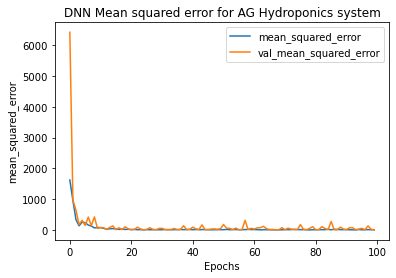

In [6]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.title('DNN Mean squared error for AG Hydroponics system')
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
#plot_history(history, 'mean_squared_logarithmic_error')
plot_history(history, 'mean_squared_error')

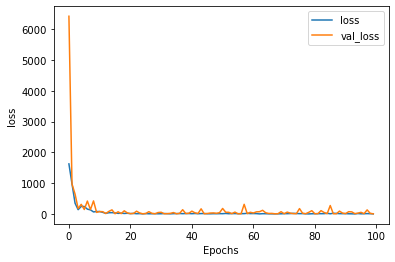

In [7]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
#plot_history(history, 'mean_squared_logarithmic_error')
plot_history(history, 'loss')

In [8]:
x_test['prediction'] = model.predict(x_test_scaled)

1/1 [==============================] - 0s 118ms/step


In [9]:
x_test['prediction']

0      70.021896
1      72.232376
2      75.343613
3      76.951187
4      78.289574
5      79.312370
6      81.029564
7      82.118301
8      86.007896
9      88.204094
10     89.029778
11     90.570038
12     93.441772
13     95.729485
14     96.079109
15     96.042595
16     99.282364
17    103.150230
Name: prediction, dtype: float32

In [10]:
#accuracy =[]
#score = model.accuracy(X_test,y_test) 
#accuracy.append(score)

In [11]:
model.

SyntaxError: invalid syntax (1068564517.py, line 1)